In [1]:
from fastbook import *
from fastdownload import download_url
from pathlib import Path


In [2]:
urls = search_images_ddg('bird photos', max_images = 1)
print(len(urls), urls [0])

1 https://www.wildbirdscoop.com/wp-content/uploads/2021/06/Eastern-Bluebird-2.jpg


In [3]:
dest = Path ('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress = False)

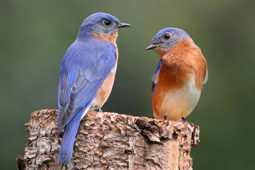

In [4]:
im = Image.open(dest)
im.to_thumb(256,255)

In [5]:

searches = ['forest', 'bird']
path = Path('bird_or_not')

# Ensure the main directory exists
path.mkdir(parents=True, exist_ok=True)

if not path.exists():
    for o in searches:
        dest = (path / o) 
        dest.mkdir(parents=True, exist_ok=True)  # Create subdirectories
        results = search_images_ddg(f'{o} photo')  
        download_images(dest, urls=results[:200])


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter (valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms= [Resize (192, method= 'squish')]
).dataloaders(path, verbose = True)


# dls.show_batch (max_n = 6 )

Found 0 items
2 datasets of sizes 0,0
Setting up Pipeline: PILBase.create


TypeError: 'NoneType' object is not iterable